In [1]:
from nltk import FreqDist
import matplotlib.pyplot as plt

## Strategies
### Word focused
If the vocabulary is what you are looking at, the next step is to remove the punctuation and the stopwords. 

With the following code, we are going to generate a list of words used in the `Body` column. It won't be extremely useful for the classification task but comparing vocabulary can be very revealing (given the right subset: spam vs. regular emails,etc.).

Once we have a list of words, we can start the vocabulary analysis by coding a counter or using `FreqDist` from the `nltk` library for example.

In [2]:
import pandas as pd
df = pd.read_csv('data/processed/data.csv',converters={'Body': lambda x: x.strip("[]").replace("'","").split(", ")})
df

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,"[already, familiar, repeating, tasks, every, s...",<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34552974,How to get all the child records from differen...,"[different, tables, like, code, code, select, ...",<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,"[like, understand, java, optionals, designed, ...",<java><optional>,2016-01-01 02:03:20,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,"[attempting, overlay, title, image, image, dar...",<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
4,34553318,Why ternary operator in swift is so picky?,"[question, simple, could, find, answer, ""nt"", ...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
...,...,...,...,...,...,...
59995,60467932,C++ The correct way to multiply an integer and...,"[try, multiply, integer, double, obtain, wrong...",<c++>,2020-02-29 17:46:41,LQ_CLOSE
59996,60468018,How can I make a c# application outside of vis...,"[new, programming, teaching, made, calculator,...",<c#><visual-studio>,2020-02-29 17:55:56,LQ_CLOSE
59997,60468378,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,"[urls.py, code, django.contrib, import, admin,...",<django><django-views><django-templates>,2020-02-29 18:35:39,LQ_EDIT
59998,60469392,PHP - getting the content of php page,"[controller, inside, server, connected, networ...",<javascript><php><html>,2020-02-29 20:32:14,LQ_CLOSE


## Word frequency for the whole dataset

In [3]:
allwords = {}
for observation in df['Body']:
    for word in range(len(observation)):
        allwords[observation[word]] = allwords.get(observation[word],0) + 1

In [4]:
allwords.pop('code')

348299

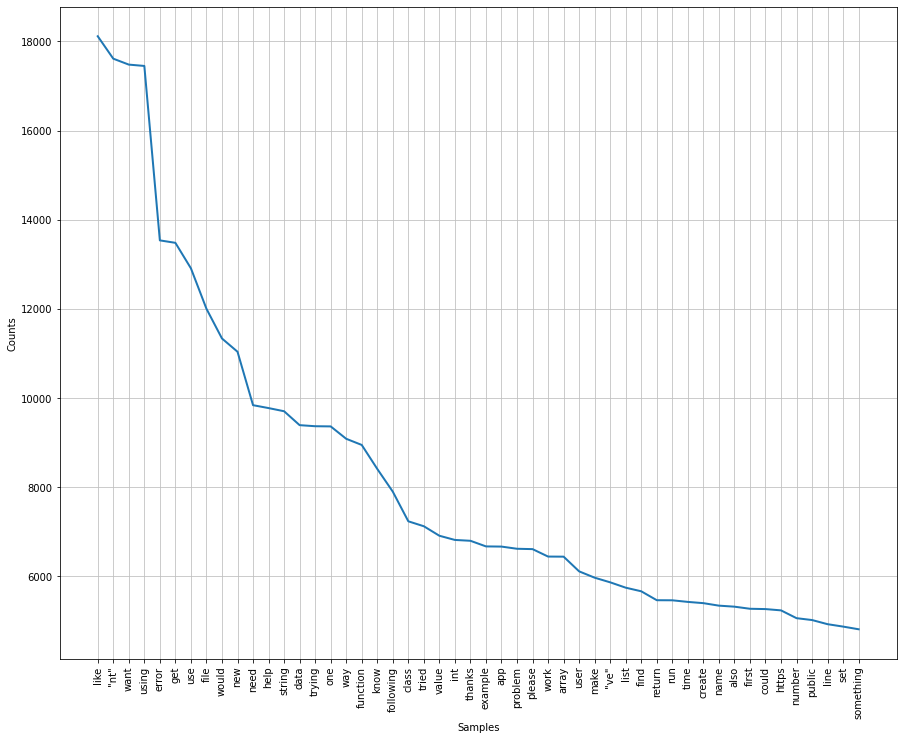

In [5]:
plt.figure(figsize=(15,12))
FreqDist(allwords).plot(50);

## Word frequency for the HQ questions

In [6]:
words_hq = {}
for observation in df['Body'][df['Y'] == 'HQ']:
    for word in range(len(observation)):
        words_hq[observation[word]] = words_hq.get(observation[word],0) + 1

In [7]:
words_hq.pop('code')

59304

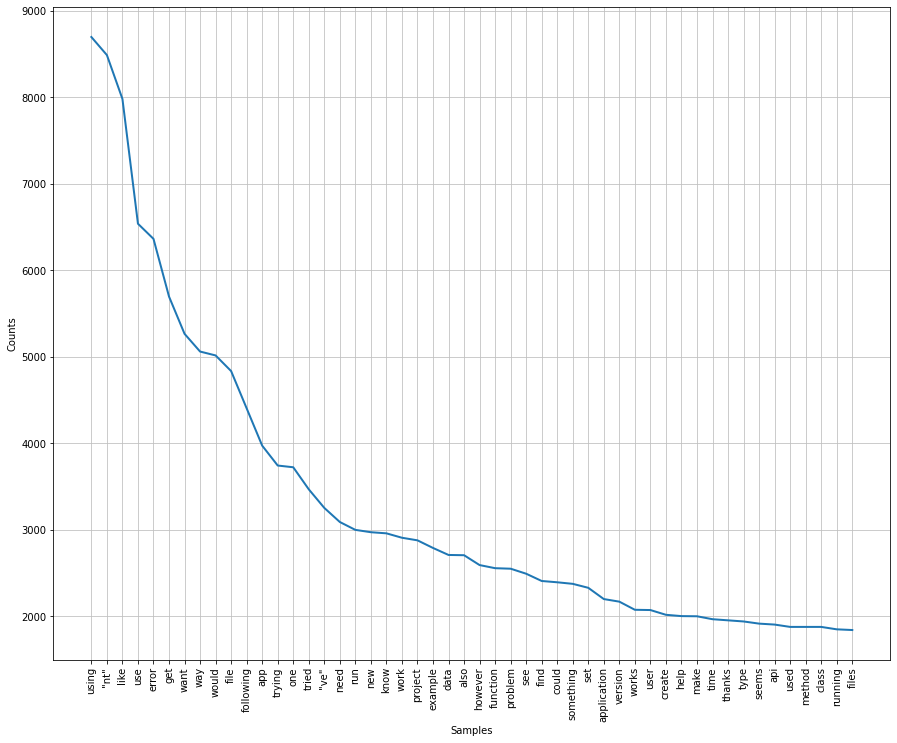

In [8]:
plt.figure(figsize=(15,12))
FreqDist(words_hq).plot(50);

## Word frequency for LQ_EDIT questions

In [9]:
words_lqe = {}
for observation in df['Body'][df['Y'] == 'LQ_EDIT']:
    for word in range(len(observation)):
        words_lqe[observation[word]] = words_lqe.get(observation[word],0) + 1

In [10]:
words_lqe.pop('code')

255557

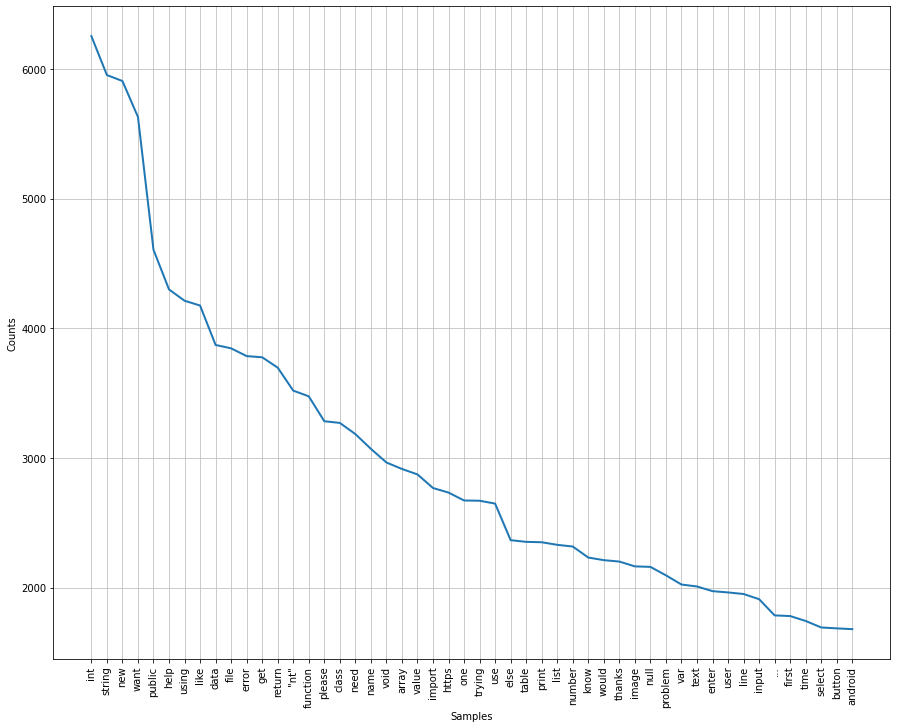

In [11]:
plt.figure(figsize=(15,12))
FreqDist(words_lqe).plot(50);

## Word frequency for LQ_CLOSE questions

In [12]:
words_lqc = {}
for observation in df['Body'][df['Y'] == 'LQ_CLOSE']:
    for word in range(len(observation)):
        words_lqc[observation[word]] = words_lqc.get(observation[word],0) + 1

In [13]:
words_lqc.pop('code')

33438

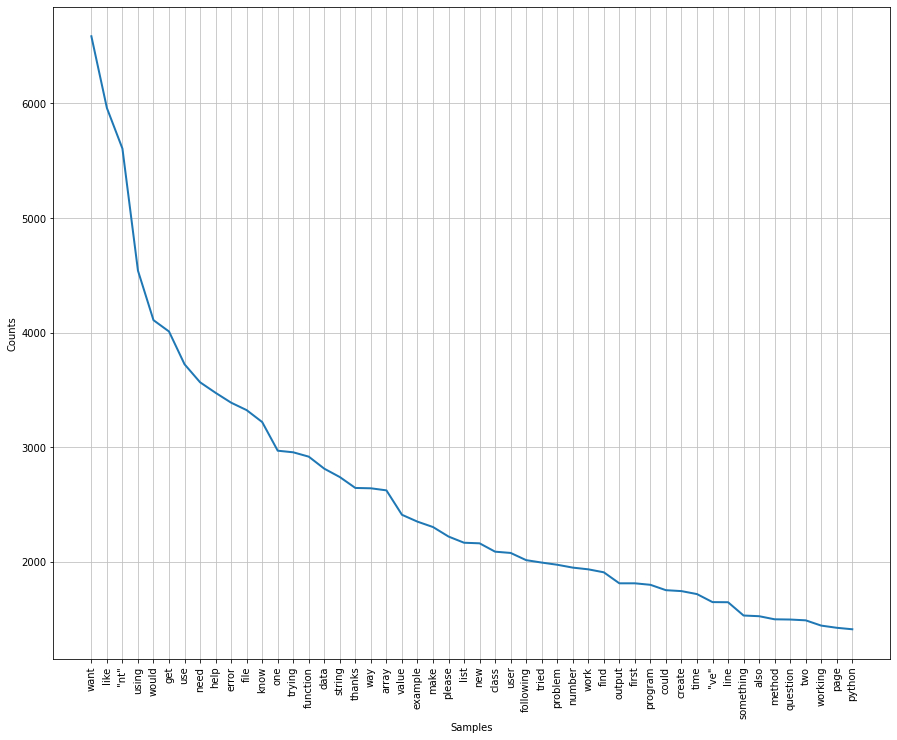

In [14]:
plt.figure(figsize=(15,12))
FreqDist(words_lqc).plot(50);

Or if you want to do a document analysis (like a TF-IDF type of analysis), you can use a lambda function to alter data in the dataframe.

## Wordcloud
Wordclouds are to text data what pie charts are to numerical data. They are at best confusing and at worst useless. But it can be generate a nice picture for your article header :)

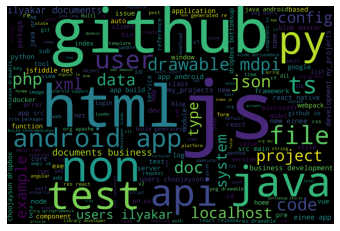

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000,
                      height = 2000
                     )

wordcloud.generate(" ".join(words_hq.keys()))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

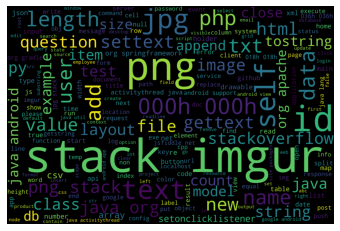

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000,
                      height = 2000
                     )

wordcloud.generate(" ".join(words_lqe.keys()))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

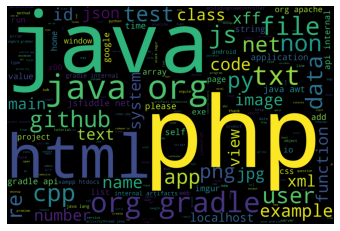

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000,
                      height = 2000
                     )

wordcloud.generate(" ".join(words_lqc.keys()))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Stemming
This process is going to remove the ending of the words, shrinking them to their stem, their common denominator. For example, in the following list:
- programmer
- programmation
- programmed
- programming
- program
- programme

The stem of these words is **program**. It is easy to imagine a stemmed document being harder to read (by a human at least) but at the same time, it is going to be easier to compare different documents. This "normalization" is going to help make a model more robust as the ambiguity is reduced.

It is worth noting:
- there are a lot of stemming algorithms, available in various languages. [nltk.stem API module](https://www.nltk.org/api/nltk.stem.html) will give you a list of stemming classes available with NLTK.
- whilst stemming simplifies a document, it also creates "new" noise:  the stem for "flies" is "fli" for example.
- whilst stemming simplifies a document, it will induce a loss of information. For example, in the "program" list above, programme is the British spelling and program, the American spelling. If the origin of the review is not an important information for your analysis: Great, stemming has made this simpler! However if the localisation is key to your problem, you might miss some nuances by stemming your documents.

In [18]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [19]:
def stem(document):
    stemmed = ''
    for word in document:
        stemmed += stemmer.stem(word) + ' '
        
    return stemmed

In [20]:
df['Stemmy'] = df['Body'].apply(lambda x:stem(x))

## Lemmatisation

In [21]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [22]:
def lem(document):
    lemmed =  ''
    for word in document:
        lemmed += wnl.lemmatize(word) + ' '
        
    return lemmed

In [23]:
df['Lemmy'] = df['Body'].apply(lambda x:lem(x))

In [24]:
df

,Id,Title,Body,Tags,CreationDate,Y,Stemmy,Lemmy
0,34552656,Java: Repeat Task Every Random Seconds,"[already, familiar, repeating, tasks, every, s...",<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,alreadi familiar repeat task everi second use ...,already familiar repeating task every second u...
1,34552974,How to get all the child records from differen...,"[different, tables, like, code, code, select, ...",<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT,differ tabl like code code select item code co...,different table like code code select item cod...
2,34553034,Why are Java Optionals immutable?,"[like, understand, java, optionals, designed, ...",<java><optional>,2016-01-01 02:03:20,HQ,like understand java option design immut threa...,like understand java optionals designed immuta...
3,34553174,Text Overlay Image with Darkened Opacity React...,"[attempting, overlay, title, image, image, dar...",<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,attempt overlay titl imag imag darken lower op...,attempting overlay title image image darkened ...
4,34553318,Why ternary operator in swift is so picky?,"[question, simple, could, find, answer, ""nt"", ...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,"question simpl could find answer ""nt"" code com...","question simple could find answer ""nt"" code co..."
...,...,...,...,...,...,...,...,...
59995,60467932,C++ The correct way to multiply an integer and...,"[try, multiply, integer, double, obtain, wrong...",<c++>,2020-02-29 17:46:41,LQ_CLOSE,tri multipli integ doubl obtain wrong result e...,try multiply integer double obtain wrong resul...
59996,60468018,How can I make a c# application outside of vis...,"[new, programming, teaching, made, calculator,...",<c#><visual-studio>,2020-02-29 17:55:56,LQ_CLOSE,new program teach made calcul calcul lab work ...,new programming teaching made calculator calcu...
59997,60468378,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,"[urls.py, code, django.contrib, import, admin,...",<django><django-views><django-templates>,2020-02-29 18:35:39,LQ_EDIT,urls.pi code django.contrib import admin code ...,urls.py code django.contrib import admin code ...
59998,60469392,PHP - getting the content of php page,"[controller, inside, server, connected, networ...",<javascript><php><html>,2020-02-29 20:32:14,LQ_CLOSE,control insid server connect network search ur...,controller inside server connected network sea...


## Train Test Split

In [25]:
labels = df['Y']
features = df.drop(columns=['Y'])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                    labels,
                                                    random_state=42)

# Initialising K-Folds
kfold = KFold(n_splits=5,
              random_state=42,
              shuffle=True
             )